In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow import keras
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [7]:
base_model = tf.keras.applications.DenseNet121(input_shape=(100,100,3),
                                               include_top=False,
                                               weights='imagenet',
                                               pooling="avg")
base_model.trainable = False
x = base_model.output
    
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.2)(x)

predictions = Dense(3, activation='softmax',name='Final')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [42]:
model.compile(loss = "categorical_crossentropy", optimizer= , metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255. , zoom_range = 0.2)
test_datagen =  ImageDataGenerator(rescale = 1./255.,)
val_datagen = ImageDataGenerator(rescale = 1./255.,)

In [9]:
train_dir = "C:\\Users\\dhruv\\Downloads\\chest_xray\\train"
test_dir = "C:\\Users\\dhruv\\Downloads\\chest_xray\\test"
val_dir = "C:\\Users\\dhruv\\Downloads\\chest_xray\\val"
train_generator = train_datagen.flow_from_directory(train_dir , batch_size = 10, class_mode = 'categorical' , target_size = (100,100))
test_generator = test_datagen.flow_from_directory(test_dir , batch_size = 10, class_mode = 'categorical' , target_size = (100,100))
valid_generator = val_datagen.flow_from_directory(val_dir , batch_size = 10, class_mode = 'categorical' , target_size = (100,100))

Found 4023 images belonging to 3 classes.
Found 383 images belonging to 3 classes.
Found 400 images belonging to 3 classes.


In [10]:
history = model.fit_generator(train_generator, validation_data=valid_generator, steps_per_epoch = 100, epochs=20)

Epoch 1/20
100/100 [==============================] - 44s 443ms/step - loss: 1.1172 - accuracy: 0.5590 - val_loss: 2.6194 - val_accuracy: 0.4000
Epoch 2/20
100/100 [==============================] - 45s 447ms/step - loss: 0.8386 - accuracy: 0.7251 - val_loss: 1.1424 - val_accuracy: 0.6850
Epoch 3/20
100/100 [==============================] - 44s 438ms/step - loss: 0.6060 - accuracy: 0.8330 - val_loss: 1.8557 - val_accuracy: 0.6775
Epoch 4/20
100/100 [==============================] - 44s 441ms/step - loss: 0.5972 - accuracy: 0.8220 - val_loss: 1.1111 - val_accuracy: 0.7350
Epoch 5/20
100/100 [==============================] - 45s 447ms/step - loss: 0.5734 - accuracy: 0.8489 - val_loss: 1.0552 - val_accuracy: 0.7325
Epoch 6/20
100/100 [==============================] - 46s 459ms/step - loss: 0.5530 - accuracy: 0.8620 - val_loss: 0.7651 - val_accuracy: 0.7825
Epoch 7/20
100/100 [==============================] - 45s 453ms/step - loss: 0.5351 - accuracy: 0.8610 - val_loss: 1.3423 - val_ac

In [11]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

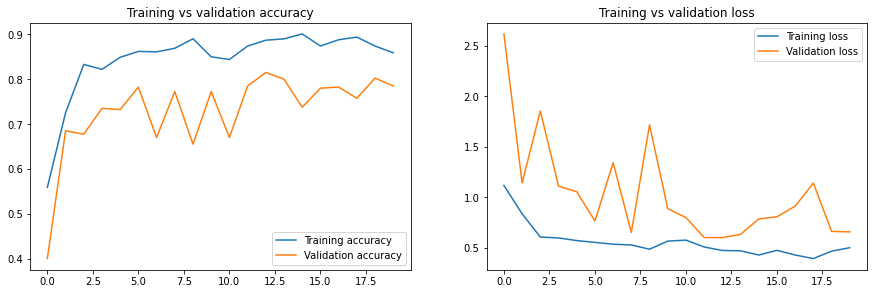

In [13]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()